# Assignment 3: Convolutions and local structure

## Working with notebooks

The assignments for this course will be presented as Jupyter notebooks, similar to this one, containing programming tasks that are automatically graded.

In an autograded assignment, you'll usually be required to complete the code of a Python function. 
It's **crucial not to alter** the function's name, inputs, or outputs, as they will be automatically tested. Please adhere closely to the assignment instructions.

The autograder converts your notebook into a Python file by concatenating all code sections and testing the resulting Python file. Hence, it's essential to ensure that your code runs correctly and without interruption.
***
### **Important Notes**
**_Always use_** `Kernel > Restart & Run All` and check the results **_before_** handing in your assignment.

Some general tips:

- Avoid using packages that are not already imported in the assignment template, and are not default Python packages.
- Avoid using "notebook magic" like `%matplotlib inline`; such commands do not work when the notebook is converted to a Python script.
***
## Working with Codegrade

The assignments for this course are automatically graded using a system called Codegrade. Your code will be tested automatically, and grades will be based solely on the correctness of the output.

Some of the Codegrade tests will run immediately, allowing you to view the output/results before the deadline (it may take a few minutes to appear). Take advantage of this to verify that your code is functioning correctly and that you're on the right track for the assignments.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.ndimage import uniform_filter
import mpl_toolkits.mplot3d.art3d as art3d

np.set_printoptions(precision=3,
                    suppress=True) # change this in case you need more precision

def imshow_row(imttllist, axs=False):
    n = len(imttllist)
    for i, imttl in enumerate(imttllist):
        if imttl is None:
            continue
        im, ttl = imttl
        plt.subplot(1,n,i+1)
        plt.imshow(im, cmap='gray')
        if not axs:
            plt.axis('off')
        plt.title(ttl)
    
def plot_stems3d(ax, x, y, z):
    for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten()):  
        line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o', markevery=(1, 1))
        ax.add_line(line)
    ax.set_xlim3d(X.min(), X.max())
    ax.set_ylim3d(Y.min(), Y.max())
    ax.set_zlim3d(np.minimum(G.min(), 0), np.maximum(G.max(),0))

    
try:
    Fcam = plt.imread('cameraman.png')
except FileNotFoundError:
    print("Please make sure cameraman.png is in your current directory")

## Exercise 1: Separable Convolutions

In the code cell below you have to time the three versions of the uniform convolution for values of N in ``sizes = np.array([3,5,7,9,11,15,19,25,31])``. You can use the ``timeit`` Python package for timing purposes (**set ``number=10`` and ``globals=globals()``**). You should present the timing results in *one* plot, clearly labelling the three versions and the axes. Then, answer the questions below.

Note: this particular exercise is not autograded.

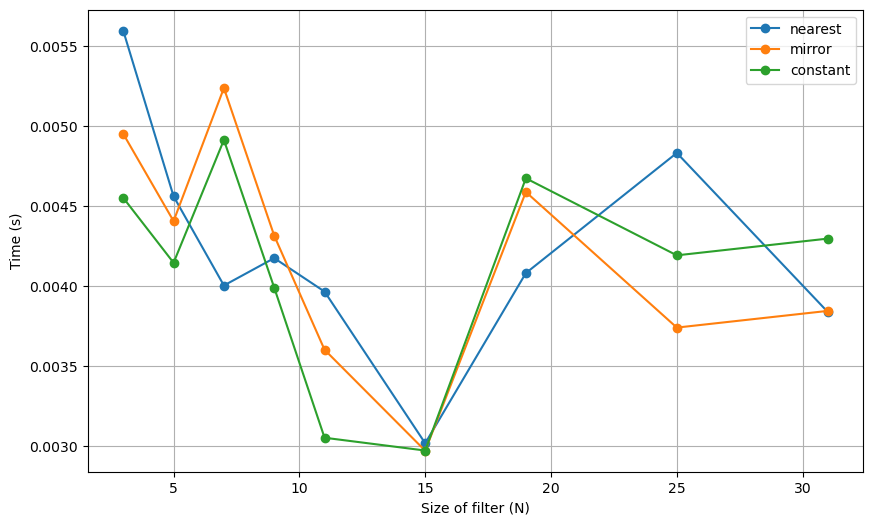

In [88]:
### YOUR CODE HERE
import timeit as time
sizes = np.array([3,5,7,9,11,15,19,25,31])
time_nearest = []
time_uniform = []
time_box = []
for size in sizes:
    t_nearest = time.timeit(
        'uniform_filter(Fcam, size=size, mode="nearest")',
        globals=globals(),
        number=10
    )
    t_mirror = time.timeit(
        'uniform_filter(Fcam, size=size, mode="mirror")',
        globals=globals(),
        number=10
    )
    t_constant = time.timeit(
        'uniform_filter(Fcam, size=size, mode="constant")',
        globals=globals(),
        number=10
    )

    time_nearest.append(t_nearest)
    time_uniform.append(t_mirror)
    time_box.append(t_constant)

plt.figure(figsize=(10, 6))
plt.plot(sizes, time_nearest, label='nearest', marker='o')
plt.plot(sizes, time_uniform, label='mirror', marker='o')
plt.plot(sizes, time_box, label='constant', marker='o')
plt.xlabel('Size of filter (N)')
plt.ylabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

**Questions.**

1. Comment on the timing diagrams (are they showing the expected behaviour?)

2. The timing of the ``uniform_filter`` should be surprising (hint: plot the timing diagrams for the separable convolution and the ``uniform_filter`` in one plot to see the difference more clearly) . Comment on this as well. What do you think is done to reach this performance?

YOUR ANSWER HERE

## Exercise 2: Impulse responses

The following filters from ``scipy.ndimage`` are all linear translation invariant filters:
 - `sobel`
 - `laplace`
 - `prewitt`
 - `gaussian_laplace`

Some of these functions have parameters that result in different kernels being used.

For each of these filter determine the impulse response. Return the impulse response function but only the smallest square part of the image centered at the middle showing non-zero responses. 
I.e. for the impulse response of the uniform filter of size 7x7 you should return a 7x7 array with all values 0.02 (remember, in the first cell, we have set the number of decimal digits to two...).

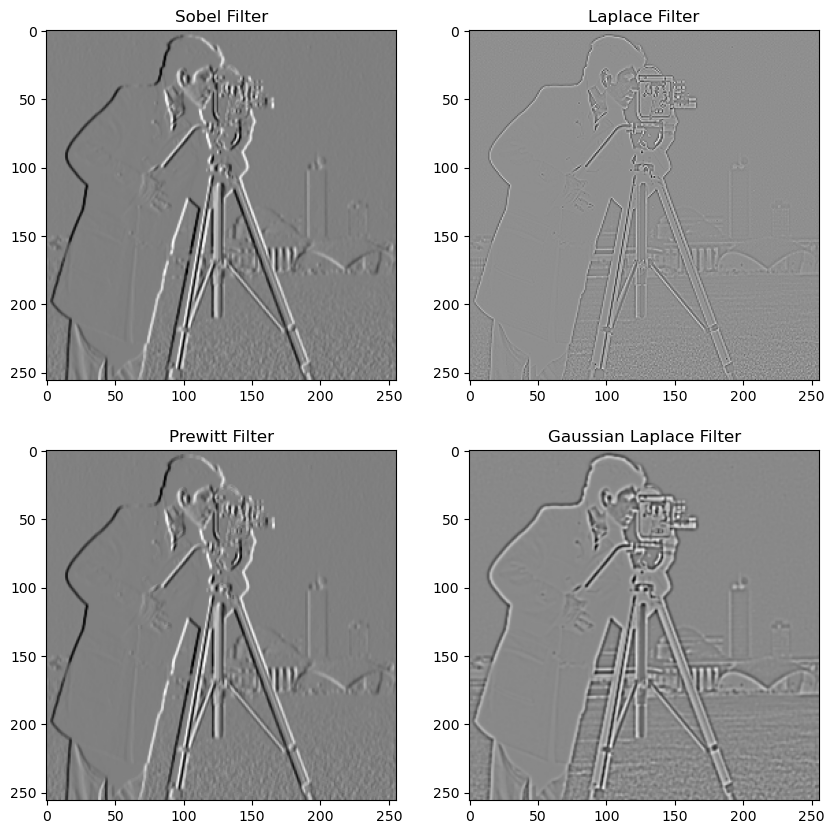

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [83]:
from scipy.ndimage import sobel, laplace, prewitt, gaussian_laplace

def sobel_filter(image=Fcam):
    ### YOUR CODE HERE
    filtered_array = sobel(image)
    return filtered_array

def laplace_filter(image=Fcam):
    ### YOUR CODE HERE
    filtered_array = laplace(image)
    return filtered_array

def prewitt_filter(image=Fcam):
    ### YOUR CODE HERE
    filtered_array = prewitt(image)
    return filtered_array

def gaussian_laplace_filter(image=Fcam):
    ### YOUR CODE HERE
    filtered_array = gaussian_laplace(image, sigma=1)
    return filtered_array


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(sobel_filter(), cmap='gray')
axs[0, 0].set_title('Sobel Filter')
axs[0, 1].imshow(laplace_filter(), cmap='gray')
axs[0, 1].set_title('Laplace Filter')
axs[1, 0].imshow(prewitt_filter(), cmap='gray')
axs[1, 0].set_title('Prewitt Filter')
axs[1, 1].imshow(gaussian_laplace_filter(), cmap='gray')
axs[1, 1].set_title('Gaussian Laplace Filter')
plt.show()


To understand what these filters do, also run the filters on the cameraman image (or any other image of your liking). What do you expect to do, or have read the filter is supposed to do?

## Exercise 3: Constructing the Laplace Filter

Utilizing the right and left first-order derivative filters provided earlier, with convolution kernels `{1 -1 0}` and `{0 1 -1}` in both horizontal and vertical directions, can you construct the Laplace filter using these four first-order derivatives? 

*Hint*: Begin by expressing the impulse response as the sum of a horizontal and a vertical function. (In the code cell following this instruction, apply the provided definitions along with the `convolve` function to create the Laplace filter.)


In [84]:
def laplace_derivatives(I):
    """
    Using only the convolve function and these four filters, compute the laplace filter of I.
    """
    Dleft = np.array([[ 0,  1, -1]])
    Dright = np.array([[ 1, -1,  0]])
    Dup = Dleft.T
    Ddown = Dright.T
    
    ### YOUR CODE HERE
    Ileft = convolve(I, Dleft)
    Iright = convolve(I, Dright)
    Iup = convolve(I, Dup)
    Idown = convolve(I, Ddown)
    laplace = Ileft + Iright + Iup + Idown
    return laplace


## Exercise 4: Anaytical derivatives

Consider the function $f$ in two variables:
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}

We set the following values for the constants $A$, $B$, $V$ and $W$:
\begin{align}
A &= 1\\
B &= 2\\
V &= \frac{6\pi}{100}\\
W &= \frac{4\pi}{100}
\end{align}

In the following cell, write code to create the discrete images $F$, $F_x$, and $F_y$. $F$ represents the sampled version of $f$ over the grid defined by $X$ and $Y$, while $F_x$ and $F_y$ correspond to the sampled derivatives $f_x$ and $f_y$, respectively. Then, display the three images side by side using the function `imshow_row`.


In [102]:
def F_partial_derivatives(X, Y):
    A = 1
    B = 2
    V = 6 * np.pi / 100
    W = 4 * np.pi / 100

    ### YOUR CODE HERE
    F = A * np.sin(V * X) + B * np.cos(W * Y)
    Fx = A * V * np.cos(V * X)
    Fy = - B * W * np.sin(W * Y)
    return F, Fx, Fy

1.2058192410423678
0.15249611076945777
-0.2390265731793245


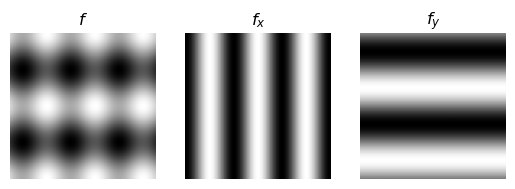

In [103]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)

F, Fx, Fy = F_partial_derivatives(X, Y)
imshow_row([(F, r"$f$"),
            (Fx, r"$f_x$"),
            (Fy, r"$f_y$")])
plt.gray()

Test your implemantation using the following code.

In [104]:
assert F.shape == Fx.shape == Fy.shape == (101, 101)

assert np.isclose(F[10, 20], 1.2058192410423678)
assert np.isclose(Fx[10, 20], 0.15249611076945777)
assert np.isclose(Fy[10, 20], -0.2390265731793245)

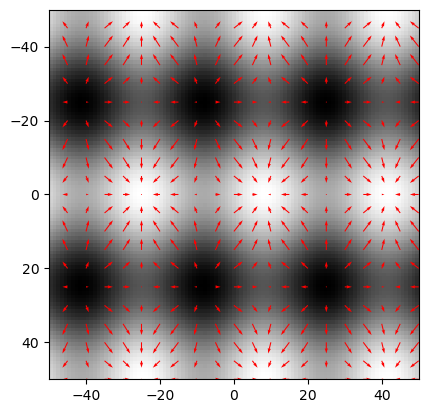

In [105]:
xx = x[::5]
yy = y[::5]
XX = X[::5, ::5]
YY = Y[::5, ::5]
FFx = Fx[::5, ::5]
FFy = Fy[::5, ::5]
plt.imshow(F, extent=(-50, 50, 50, -50), origin='upper')
plt.quiver( xx, yy, FFx, FFy, color='red', angles='xy' );

Note that gradient vectors, originating from the sparser grid points defined by ``XX`` and ``YY``, should ideally point towards the maximum increase in function value—namely, towards the centers of bright white spots.


## Exercise 5: Finite Difference Derivatives

Consider the function $f$ in two variables:

\begin{align}
f(x,y) = 3(1-x)^2 \exp\left(-x^2 - (y-1)^2\right)
 - 10\left(\frac{x}{5} - x^3 - y^5\right) \exp\left(-x^2 - y^2\right) 
 - \frac{1}{3} \exp\left(-(x+1)^2 - y^2\right)
 \end{align}
 
In the cell below you should approximate the partial derivatives (call the variables ``Fxml`` and ``Fyml``) using finite difference convolutions

In [ ]:
import scipy.ndimage # Contains the convolve function.

def finite_difference_derivatives(Xml, Yml):
    """
    Given a grid Xml, Yml (in the output format of np.meshgrid), compute (using finite difference convolutions):
    
    Fml (given): the value of the function f on the grid.
    Fxml: the deriviative in the x direction.
    Fyml: the derivative in the y direction.
    
    Return Fml, Fxml, Fyml.
    """
    Fml = 3 * (1-Xml)**2 * np.exp(-(Xml**2) - (Yml+1)**2) \
        - 10 * (Xml/5 - Xml**3 - Yml**5) * np.exp(-Xml**2 - Yml**2) \
        - 1/3 * np.exp(-(Xml+1)**2 - Yml**2) 

    ### YOUR CODE HERE
    raise NotImplementedError


Test your implemantation using the following code.

In [ ]:
xml = np.linspace(-3, 3, 150)
yml = np.linspace(-3, 3, 150)
Xml, Yml = np.meshgrid(xml, yml)
Fml, Fxml, Fyml = finite_difference_derivatives(Xml, Yml)

imshow_row([(Fxml, r"$f_x$"), (Fyml, r"$f_y$")])

assert Fxml.shape == Fyml.shape == (150, 150)
assert np.isclose(Fxml[50, 60], -0.04245716117236498)
assert np.isclose(Fyml[50, 60], 0.29461883737214256)

NotImplementedError: 

The code below then should plot the gradient vectors in a sparse grid overlayed on top of the image ``Fml``.

In [ ]:
xxml = xml[::5]
yyml = yml[::5]
XXml = Xml[::5, ::5]
YYml = Yml[::5, ::5]
FFxml = Fxml[::5, ::5]
FFyml = Fyml[::5, ::5]
plt.imshow(Fml, extent=(-3, 3, 3, -3), origin='upper')
plt.quiver(xxml, yyml, FFxml, FFyml, color='red', angles='xy');

NameError: name 'Fxml' is not defined

## Exercise 6: Gaussian 2D function

The 2D Gaussian function $G^s(x,y)$ is defined as:
\begin{align}
G^s(x,y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2+y^2}{2 s^2}}
\end{align}

The function ``Gauss2d(scale, factor)`` should a return a tuple ``(X, Y, G)`` where ``X, Y`` are the 2D grid arrays generated with the ``np.meshgrid`` function and ``G`` is the sampled Gaussian function.

The Gauss kernel should be **normalized** in such a way that at each point in the image it calculates a weighted average of its neighbor points.

In [ ]:
def Gauss2d(scale, factor):
    # If we take N = ceil(scale*factor), then a 2N+1 x 2N + 1 filter is a good size for the grid.
    N = np.ceil(scale * factor).astype(int)
    
    ### YOUR CODE HERE
    raise NotImplementedError


Test your implemantation using the following code.

In [ ]:
X, Y, G = Gauss2d(3.7, 1.4)
fig = plt.figure(99)
ax1 = fig.add_subplot(121)
ax1.imshow(G);
ax2 = fig.add_subplot(122, projection='3d')
plot_stems3d(ax2, X, Y, G)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
X, Y, G = Gauss2d(3.7, 1.4)
assert X.shape == Y.shape == G.shape == (13, 13)
assert np.isclose(np.sum(G), 1)
assert X[1,4] == -2
assert Y[1,4] == -5
assert np.isclose(G[1,4], 0.004742521299253816)

TypeError: cannot unpack non-iterable NoneType object

## Exercise 7: 1D Gaussian function

Using the calculated partial derivatives, now write the code for the ``Gauss1D`` function (and your derivatives will be tested then). The function should return a tuple ``(X, G)``, where ``X`` is a 1D grid array, and ``G`` represents the sampled Gaussian function. Ensure the Gaussian kernel is **normalized** to compute a weighted average of neighboring points in the image.

In [ ]:
def Gauss1d(scale, order=0, factor=3):
    """If order=0, this function should give a normalized sample of the 1d Gaussian function, 
    similar to the Gauss2d function above. If order=1 or order=2, this function should give an 
    approximation for the first respectively second derivative by multiplying this sample by the
    appropriate analytically determined polynomial (see guide notebook)."""

    ### YOUR CODE HERE
    raise NotImplementedError


Test your implemantation using the following code.

In [ ]:
x0, G0 = Gauss1d(1.5, 0, 5)
x1, G1 = Gauss1d(1.5, 1, 5)
x2, G2 = Gauss1d(1.5, 2, 5)
assert x0.shape == G0.shape == (17,)
assert (x0 == x1).all() and (x1 == x2).all()
assert np.isclose(np.sum(G0), 1)
assert np.isclose(G0[4], 0.0075973240783234215)
assert np.isclose(G1[4], 0.013506353917019416)
assert np.isclose(G2[4], 0.020634707373224107)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
s = 1.5
factor = 5
x, G3 = Gauss1d(s, order=0, factor=factor)
plt.plot(x, G3, '.-')
x, G3x = Gauss1d(s, order=1, factor=factor)
x, G3xx = Gauss1d(s, order=2, factor=factor)
plt.axhline() # the x-axis
plt.plot(x, G3x, '.-');
plt.plot(x, G3xx, '.-');

TypeError: cannot unpack non-iterable NoneType object

## Exercise 8: Gaussian (Derivative) Convolution

Use the function ``Gauss1d`` and ``convolve1d`` to implement the ``gD`` function:

In [ ]:
from scipy.ndimage import convolve1d

def gD(f, scales, orders, factor=3, mode='nearest', cval=0):
    """ 
    f: the function to convolve
    scales: the scales in the x and y direction, respectively
    orders: the orders of the derivatives (0 <= order <= 2)
    factor: the factor with which you compute the scale to get the size of the domain.
    mode, cval: the border mode to use in the convolution, and the constant value in case the mode is `constant`.
    
    returns: the convolution of f with the appropriate Gaussian derivative.
    """
    
    ### YOUR CODE HERE
    raise NotImplementedError

Test your implemantation using the following code.

In [ ]:
F = np.array([[65, 13, 15, 18, 69, 39, 38, 19, 61,  5],
       [55, 35, 12, 96, 95, 98, 80,  2, 86, 22],
       [41, 39, 91, 33, 68, 52, 18, 46, 82, 16],
       [96, 48, 57, 28, 79, 10, 84, 18, 46, 92],
       [41, 70, 32, 59, 15, 48, 58, 96, 88, 99],
       [78, 48, 26, 68, 56, 97, 79, 19, 55, 59],
       [80,  6, 54, 93, 10, 28, 10, 69, 25, 27],
       [44, 33, 25, 73, 92, 41, 15, 23, 78,  9],
       [ 3, 48,  0, 69,  6, 82, 33, 59, 22, 28],
       [66, 94, 18, 17, 13, 73, 16, 18, 25, 64]]).astype(np.float64)
F01 = gD(F, (3.5, 3.5), (0, 1), 3)
F21 = gD(F, (2.5, 2.5), (2, 1), 3)
assert F01.shape == F21.shape == (10, 10)
assert np.isclose(F01[4, 5], -0.6600031308571785)
assert np.isclose(F21[6, 3], -0.1254832128531149)

AttributeError: 'NoneType' object has no attribute 'shape'

TypeError: Image data of dtype object cannot be converted to float

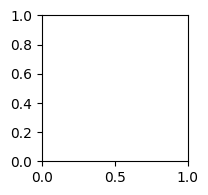

In [ ]:
# Show the derivatives by convolving with an impulse.
I = np.zeros((21,21))
I[10, 10] = 1
G3 = gD(I, (3,3), (0,0), 3)
imshow_row([ (G3, r"$G^3$"), None, None])

plt.figure()
Gx3 = gD(I, (3,3), (0,1), 3)
Gy3 = gD(I, (3,3), (1,0), 3)
imshow_row([ (Gx3, r"$G^3_x$"), (Gy3, r"$G^3_y$"), None])

plt.figure()
Gxx3 = gD(I, (3,3), (0,2), 3)
Gxy3 = gD(I, (3,3), (1,1), 3)
Gyy3 = gD(I, (3,3), (2,0), 3)
imshow_row([ (Gxx3, r"$G^3_{xx}$"), 
             (Gxy3, r"$G^3_{xy}$"),
             (Gyy3, r"$G^3_{yy}$")])


In [ ]:
s = 1
fs = gD(Fcam, (s,s), (0,0), 3)
imshow_row([ (fs, r"$f\ast G^{%5.2f}$" % s), None, None])

plt.figure()
fxs = gD(Fcam, (s,s), (0,1), 3)
fys = gD(Fcam, (s,s), (1,0), 3)
imshow_row([(fxs, r"$f\ast G^{%5.2f}_x$" % s), 
            (fys, r"$f\ast G^{%5.2f}_y$" % s), 
            None])

plt.figure()
fxxs = gD(Fcam, (s,s), (0,2), 3)
fxys = gD(Fcam, (s,s), (1,1), 3)
fyys = gD(Fcam, (s,s), (2,0), 3)
imshow_row([ (fxxs, r"$f\ast G^{%5.2f}_{xx}$" % s), 
             (fxys, r"$f\ast G^{%5.2f}_{xy}$" % s),
             (fyys, r"$f\ast G^{%5.2f}_{yy}$" % s)])


## Exercise 9: Canny Edge Detector

Implement the Canny edge detector using the `gD` function developed in previous exercises. Your function `E = canny(F, s)` should produce an image `E`, marking edge pixels with their gradient norm values and setting non-edge pixels to zero.

To detect zero crossings, create a function that examines each 3x3 pixel neighborhood for negative and positive values on opposite sides of the center pixel. Although not flawless, this method is effective. Use the `generic_filter` function for this purpose.

Apply your Canny detector on the `cameraman.png` image, experiment with various scale values for derivative calculations, and discuss the outcomes and any observed differences.

In [ ]:
from scipy.ndimage import generic_filter

def zero_crossing(nbh):
    """
    Takes a 3x3 neighborhood of a point given as a 1D array with 9 elements, and 
    determines whether that point is a zero crossing. (Input as a 1D array, since
    this is the format used by generic_filter.)
    """
    f1, f2, f3, f4, f5, f6, f7, f8, f9 = nbh
    if f1 * f9 < 0:
        return 1
    if f2 * f8 < 0:
        return 1
    if f3 * f7 < 0:
        return 1
    if f4 * f6 < 0:
        return 1
    return 0

def canny(F, scale):    
    ### YOUR CODE HERE
    raise NotImplementedError


In [ ]:
F = plt.imread('cameraman.png')
zc1 = canny(F, 1)
zc2 = canny(F, 2)
zc4 = canny(F, 4)
zc8 = canny(F, 8)

imshow_row([(zc1, "Canny (s=1)"),
            (zc2, "Canny (s=2)")])
plt.figure()
imshow_row([(zc4, "Canny (s=4)"),
            (zc8, "Canny (s=8)")])